![](https://www.aeef.es/wp-content/uploads/2020/12/komvida-logo.jpg)
# **Proyecto de Análisis de las ventas semanales de cada cliente**
Este proyecto tiene como objetivo desarrollar un modelo de pronóstico para prever las ventas semanales de cada cliente para el año 2024, basándote en los datos históricos de 2022 y 2023. El pronóstico debe considerar diferencias por formatos de producto (250 ml y 750 ml) e incluir todas las semanas del año.

## Fuentes de datos
Conjunto de datos en Excel con ventas semanales de clientes durante los años 2022 y 2023. Este archivo incluye columnas de cliente, formato del producto, año, semana y número de botellas vendidas.


### Importamos la librerias necesarias:

In [26]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd


#visualización de datos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ==============================================================================
import warnings

warnings.filterwarnings("ignore")

In [62]:
# Leemos los datos
df = pd.read_excel('Fichero base clientes.xlsx')

# Eliminamos las filas duplicadas

df_drop_duplicates = df.drop_duplicates(df)

df_drop_duplicates.head(10)

,Cliente,Formato ml,Año,Semna,Nº botellas
0,Nombre1,250,2023,40,336
1,Nombre1,250,2024,7,192
2,Nombre1,250,2023,42,180
3,Nombre2,250,2024,3,648
4,Nombre2,250,2024,4,648
5,Nombre2,250,2024,5,1080
6,Nombre2,250,2024,7,864
7,Nombre2,250,2024,8,1080
8,Nombre2,250,2024,9,216
9,Nombre2,250,2024,11,864


In [77]:
# Información de datos
df_drop_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10007 entries, 0 to 10007
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cliente      10007 non-null  object
 1   Formato ml   10007 non-null  int64 
 2   Año          10007 non-null  int64 
 3   Semna        10007 non-null  int64 
 4   Nº botellas  10007 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 469.1+ KB


- Vemos que no tenemos ningún datos nulo

In [58]:
def plot_boxplot_with_outliers(dataframe, x_col, y_col, figsize=(30, 20)):
    fig, ax = plt.subplots(figsize=figsize)
    sns.boxplot(x=x_col, y=y_col, data=dataframe, ax=ax)

    groups = dataframe[x_col].unique()

    # Calcula el rango intercuartílico por grupo
    group_iqr = dataframe.groupby(x_col)[y_col].quantile(0.75) - dataframe.groupby(x_col)[y_col].quantile(0.25)

    # Define el límite superior e inferior para detectar outliers
    lower_limit = dataframe.groupby(x_col)[y_col].quantile(0.20) - 1.5 * group_iqr
    upper_limit = dataframe.groupby(x_col)[y_col].quantile(0.80) + 1.5 * group_iqr

    for i, group in enumerate(groups):
        outlier_mask = (dataframe[x_col] == group) & ((dataframe[y_col] < lower_limit[group]) | (dataframe[y_col] > upper_limit[group]))
        outliers = dataframe.loc[outlier_mask, y_col]
        ax.plot([i] * len(outliers), outliers, 'ro', markersize=5)

        # Calcula las estadísticas por grupo
        group_data = dataframe.loc[dataframe[x_col] == group, y_col]
        min_value = round(group_data.min())
        max_value = round(group_data.max())
        mean_value = round(group_data.mean(), 2)
        median_value = round(group_data.median(), 2)

        # Agrega las etiquetas de mínimo, máximo y media al gráfico
        ax.text(i, min_value, f'Mínimo: {min_value}', ha='center', va='top', color='black', fontsize=12)
        ax.text(i, max_value, f'Máximo: {max_value}', ha='center', va='bottom', color='black', fontsize=12)
        ax.text(i, mean_value, f'Media: {mean_value}', ha='center', va='bottom', color='black', fontsize=12)
        ax.text(i, median_value, f'Mediana: {median_value}', ha='center', va='bottom', color='black', fontsize=12)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_xlabel(x_col, fontsize=30)
    ax.set_ylabel(y_col, fontsize=30)
    ax.set_title(f'Boxplot por {x_col}', fontsize=40)
    plt.show()


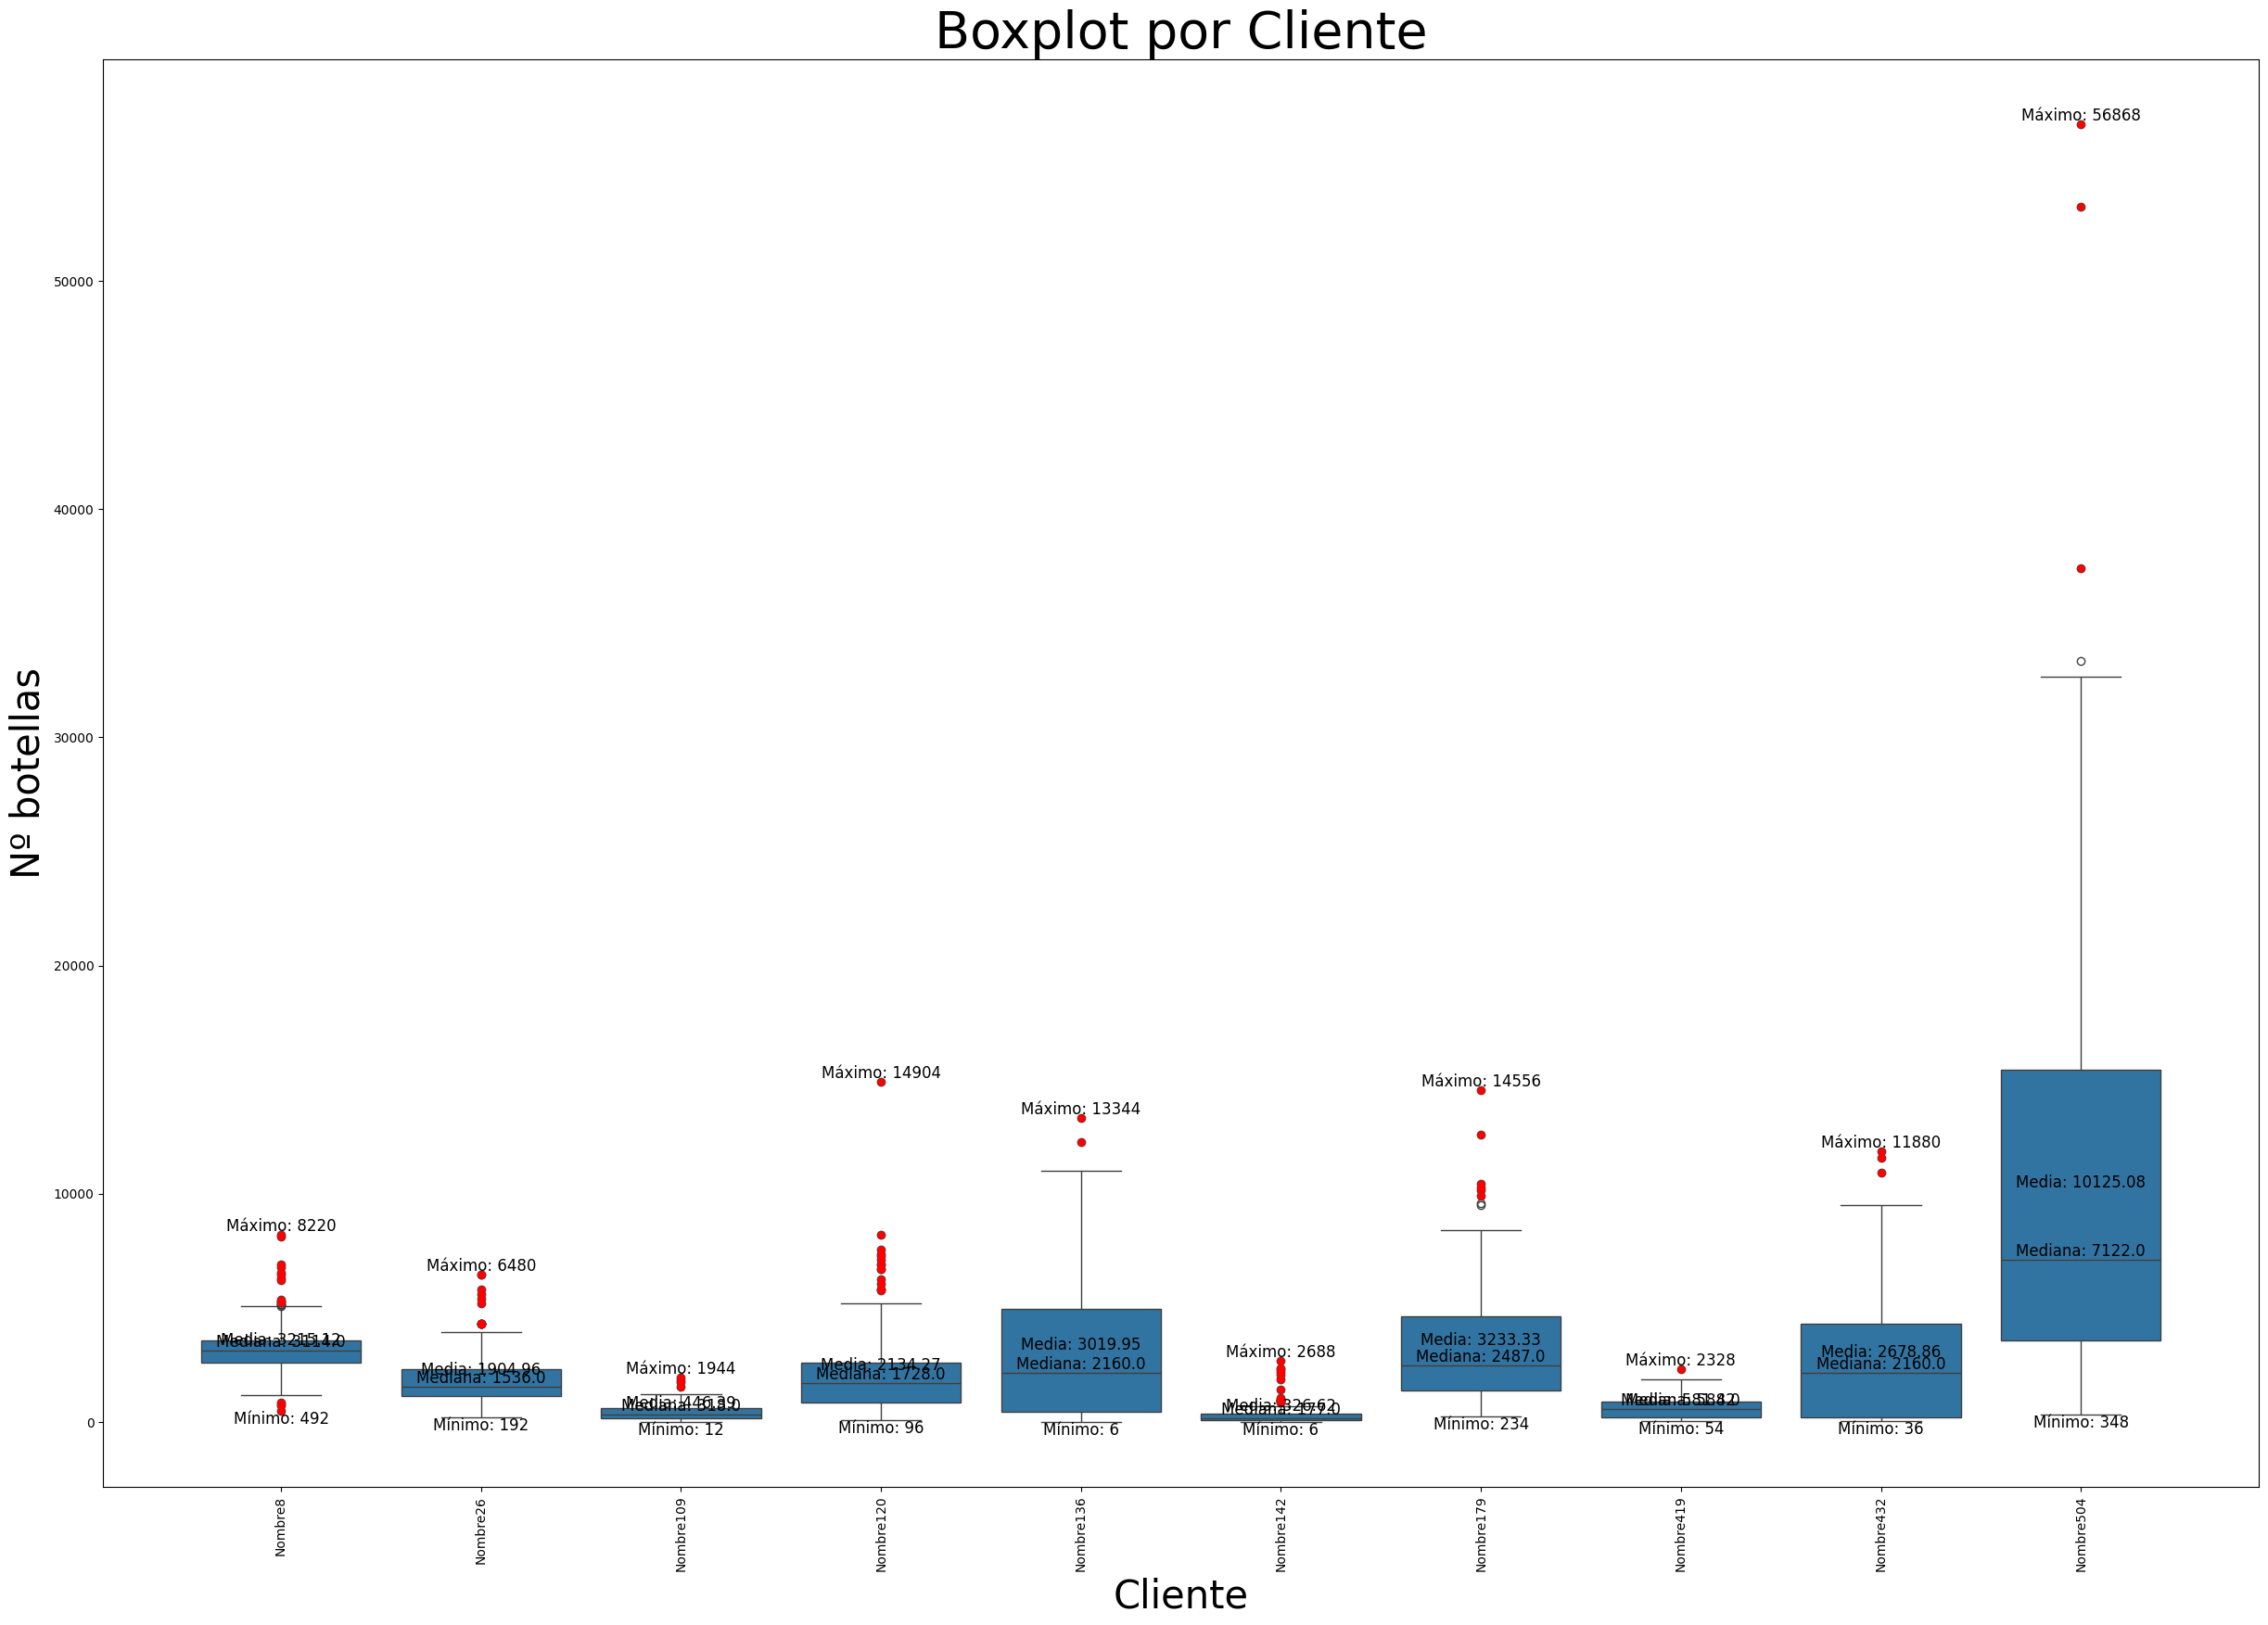

In [63]:
# Seleccionamos los 10 clientes con más ventas para hacernos una idea de como está la distribución y para poder identificar los Outliers 
cliente_top_10 = df_drop_duplicates.Cliente.value_counts().head(10).index.tolist()

plot_boxplot_with_outliers(df_drop_duplicates[df_drop_duplicates['Cliente'].isin(cliente_top_10)], 'Cliente', 'Nº botellas')

In [82]:
# Analizamos en qué semana del año vende más cada cliente,
ventas_por_semana = df_drop_duplicates.groupby(['Cliente', 'Semna'])['Nº botellas'].max().reset_index()
ventas_por_semana.head(10)

,Cliente,Semna,Nº botellas
0,Nombre1,7,192
1,Nombre1,40,336
2,Nombre1,42,180
3,Nombre10,7,108
4,Nombre100,1,96
5,Nombre100,2,120
6,Nombre100,3,48
7,Nombre100,4,48
8,Nombre100,5,96
9,Nombre100,6,48


In [85]:
# # Analizamos en qué semana del año se vende más komubucha
ventas_por_semana['Semna'].value_counts().reset_index()

,Semna,count
0,10,151
1,11,147
2,2,142
3,9,141
4,17,139
5,5,137
6,37,136
7,6,135
8,7,131
9,3,130
